# Week 6: Data Visualization with `matplotlib`

## a Brief Recap:

* Hello, how are you?
* Today: visualizing data in Python with:
    - `matplotlib`
    - `seaborn`
    - and some other helpfull examples
* Next week: (can you believe it will be week 8 already?!?!)
    - building data dashboards
    - catching up with Python Classes

## about `matplotlib`


*"My goal is to make high quality, publication quality plotting easy in python, with syntax familiar to MATLAB users"* - John D. Hunter


<tr>
<td> <img src="https://paw.princeton.edu/sites/default/files/styles/portrait_feature/public/images/content/90-Hunter-John-D.jpg?itok=wDYFhIbT" alt="Drawing" style="width: 200px;"/> </td>
<td> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/Created_with_Matplotlib-logo.svg/1024px-Created_with_Matplotlib-logo.svg.png" alt="Drawing" style="width: 200px;"/> </td>
</tr>

## more about `matplotlib`

* a plotting library designed to have MATLABlike functionality
* an extension of `NumPy`
* many other Python visualizations are implemented as extensions of `matplotlib`
* interfaces with `.py`, `.ipynb`, web applications and GUI toolkits
* can export to various hard-copy formats (publication quality)
* bummer: no great for 3D visualizations


## `matplotlib` architecture

* Three layer stack: 
    1. **scripting** - what the user uses to create
        * the [**pyplot API**](https://matplotlib.org/stable/api/index.html) - the command style functions that make `matplotlib` work like MATLAB
    2. **Artist** - does the internal work of rendering
        * the Artist object draws various elements of a plot
            - primitives: what to render (lines, text, shapes)
            - containers: where to render (axes, figure)
    3. **backend** - displays the plot
        * **user-interface (interactive)** - GUIs, etc
        * **hard-copy (non-interactive)** - .png, .svg, .pdf

## `matplotlib` figure

**Figure** - the higher level opbject that contains all elements of a graph: the primatives and the containers
<img src="anatomy_matplotlib.png" width="60%" style="margin-left:auto; margin-right:auto">

## `matplotlib` getting started

We'll be working in non-interactive mode. To display the plot, we need to explicitly do so by calling `plt.show()`

In [8]:
# set the screen output as the backend
%matplotlib inline

# import matplotlib with the synonym 'plt'
import matplotlib.pyplot as plt 

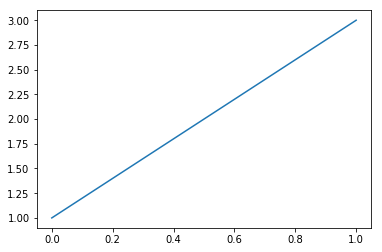

In [12]:
# create a simple line graph
plt.plot([1,3]) 
plt.show()

### invite Artists

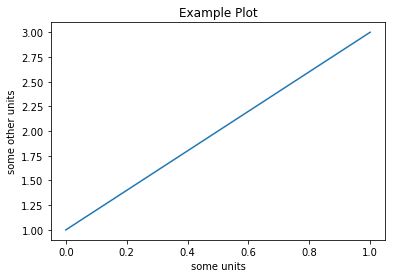

In [15]:
# add some labels to the axes and a title
#plt.plot([1,3]) equivalent to:
plt.plot([0,1],[1,3])
plt.title( 'Example Plot' )
plt.xlabel( 'some units' )
plt.ylabel( 'some other units' )
plt.show()

## plotting Data

the `.plot()` method can take python lists, numpy arrays or pandas Dataframe columns  
we need our data to be formatted correctly for `matplotlib`

In [16]:
import numpy as np
import pandas as pd

## Revisit the Pima Indians data

In [20]:
path = 'https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/datasets/diabetes.csv'
diabetes_pima = pd.read_csv( path )
pimacolumns_2change = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_pima[ pimacolumns_2change ] = diabetes_pima[ pimacolumns_2change ].replace(0, np.nan )
diabetes_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## visualize `DiabetesPedigreeFunction` ~ Age

**Diabetes Pedigree Function** - provides a measure of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. Could be considered a measure of the hereditary risk associated with the onset of diabetes mellitus. 

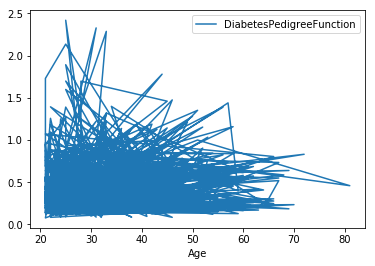

In [21]:
diabetes_pima.plot( x = 'Age', y = 'DiabetesPedigreeFunction')
plt.show()

## we can do so much better...

a line plot was clearly inappropriate to render the distribution of the data.  
`matplotlib` has many other plotting methods we can chose from. Here are some basics:  

* Bar 
* Scatter 
* Histogram
* Box
* Violin
* for extensive lists with example code:
    - [python-graph-gallery](https://www.python-graph-gallery.com/)
    - [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html#pyplot)

## Scatter plot

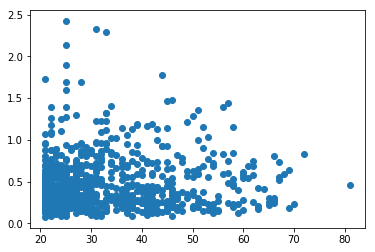

In [25]:
plt.scatter( x = diabetes_pima['Age'], 
            y = diabetes_pima['DiabetesPedigreeFunction'])
plt.show()

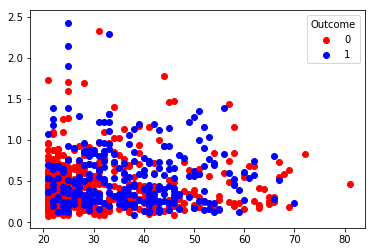

In [38]:
fig, ax = plt.subplots()
colors = [ 'red', 'blue' ]
for idx, outcome in enumerate( set( diabetes_pima['Outcome'] ) ):
    #print( outcome )
    outcome_idx = np.where( diabetes_pima['Outcome'] == outcome )
    #print( outcome_idx )
    ax.scatter(  x = diabetes_pima['Age'].iloc[outcome_idx], 
               y = diabetes_pima['DiabetesPedigreeFunction'].iloc[outcome_idx],
               color = colors[ idx ] )
plt.legend(labels = ['0','1'], title = 'Outcome')
plt.show()

## Histogram

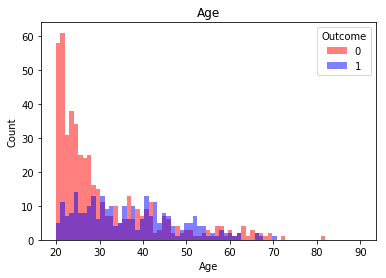

In [52]:
bins = np.linspace( 20,90,70 )
colors = [ 'red', 'blue' ]

for idx, outcome in enumerate( set( diabetes_pima['Outcome'] ) ):
    outcome_idx = np.where( diabetes_pima['Outcome'] == outcome )
    plt.hist(  diabetes_pima['Age'].iloc[outcome_idx], 
             bins, alpha = 0.5, color = colors[ idx ] )
    
plt.legend(labels = ['0','1'], title = 'Outcome')
plt.title( 'Age' )
plt.xlabel( 'Age' )
plt.ylabel( 'Count' )
plt.show()

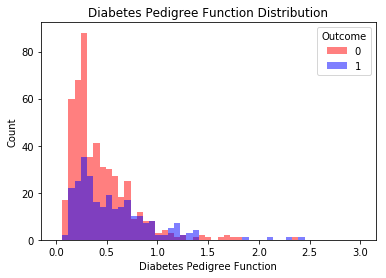

In [50]:
bins = np.linspace( 0,3 )
colors = [ 'red', 'blue' ]

for idx, outcome in enumerate( set( diabetes_pima['Outcome'] ) ):
    outcome_idx = np.where( diabetes_pima['Outcome'] == outcome )
    plt.hist(  diabetes_pima['DiabetesPedigreeFunction'].iloc[outcome_idx], 
             bins, alpha = 0.5, color = colors[ idx ] )
    
plt.legend(labels = ['0','1'], title = 'Outcome')
plt.title( 'Diabetes Pedigree Function Distribution' )
plt.xlabel( 'Diabetes Pedigree Function' )
plt.ylabel( 'Count' )
plt.show()

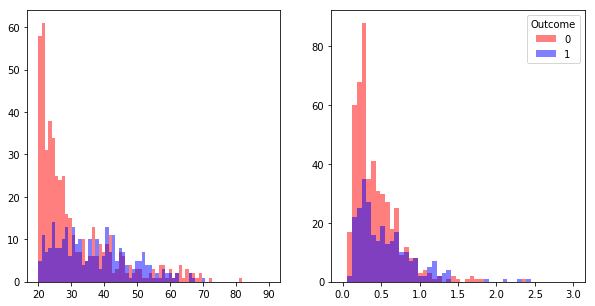

In [49]:
fig, ax = plt.subplots( figsize = (10,5) )
binsAge = np.linspace( 20,90, 70 )
binsDPF = np.linspace( 0,3 )
colors = [ 'red', 'blue' ]

for idx, outcome in enumerate( set( diabetes_pima['Outcome'] ) ):
    outcome_idx = np.where( diabetes_pima['Outcome'] == outcome )
    plt.subplot( 1,2,1 )
    plt.hist(  diabetes_pima['Age'].iloc[outcome_idx], binsAge, alpha = 0.5, color = colors[ idx ] )
    plt.subplot( 1,2,2 )
    plt.hist(  diabetes_pima['DiabetesPedigreeFunction'].iloc[outcome_idx], 
             binsDPF, alpha = 0.5, color = colors[ idx ] )
    
plt.legend(labels = ['0','1'], title = 'Outcome')
plt.show()

## Grouped bar chart

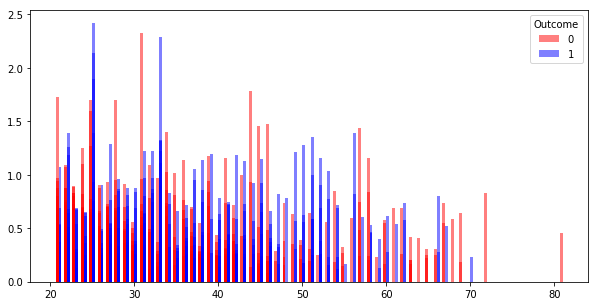

In [72]:
fig, ax = plt.subplots( figsize = (10,5) )
colors = [ 'red', 'blue' ]
width = 0.35

outcome0_idx = np.where( diabetes_pima['Outcome'] == 0 )
outcome1_idx = np.where( diabetes_pima['Outcome'] == 1 )

series0 = ax.bar( diabetes_pima['Age'].iloc[outcome0_idx] - width/2, 
                 diabetes_pima['DiabetesPedigreeFunction'].iloc[outcome0_idx], width, 
                 label = '0', alpha = 0.5, color = colors[0])
series1 = ax.bar( diabetes_pima['Age'].iloc[outcome1_idx ] + width/2, 
                 diabetes_pima['DiabetesPedigreeFunction'].iloc[outcome1_idx ], width,
                 label = '1', alpha = 0.5, color = colors[1])
    
plt.legend(labels = ['0','1'], title = 'Outcome')
plt.show()

## Hmmmm let's bin and aggregate the data by `Age`

In [73]:
# binning by age
diabetes_pima['rounded_Age'] = diabetes_pima['Age'].apply( lambda x: int( 10 * round( float(x)/10 ) ) )
diabetes_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,rounded_Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,30
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,30
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,20
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30


In [84]:
# aggegate by the new feature 'rounded_Age'
diabetes_pima_ageAgg = diabetes_pima.groupby(['rounded_Age', 'Outcome']).mean().reset_index(level='Outcome')
diabetes_pima_ageAgg

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
rounded_Age,,,,,,,,,
20,0,1.518018,105.698630,66.424528,25.085561,124.683099,29.953953,0.416680,22.680180
20,1,1.666667,142.533333,70.380952,35.176471,192.400000,37.015556,0.653933,23.333333
30,0,3.250000,112.300000,72.214815,29.113402,143.573333,31.830216,0.439757,28.914286
30,1,3.518519,137.901235,72.205479,32.962963,192.044444,35.632500,0.597185,29.851852
40,0,6.217949,112.666667,75.106667,31.300000,120.451613,32.219231,0.444526,39.679487
40,1,6.714286,142.475610,77.848101,31.981132,182.781250,35.872619,0.457750,40.166667
50,0,6.625000,113.833333,81.708333,28.833333,96.444444,32.633333,0.398125,49.000000
50,1,7.125000,143.825000,79.525000,30.321429,235.300000,33.582051,0.543550,50.050000
60,0,6.074074,128.037037,75.814815,26.642857,210.166667,28.933333,0.445481,59.851852


In [103]:
x0 = np.arange( len( labels ) )
print( x0 )
x1 = x0[:-1]
print( x1)

[0 1 2 3 4 5 6]
[0 1 2 3 4 5]


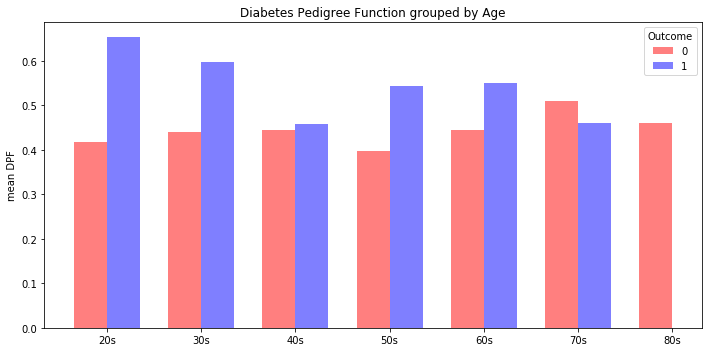

In [107]:
fig, ax = plt.subplots( figsize = (10,5) )
colors = [ 'red', 'blue' ]
labels = [ '20s', '30s', '40s', '50s', '60s', '70s', '80s' ]
x0 = np.arange( len( labels ) )
x1 = x0[:-1]
width = 0.35


outcome0_idx = np.where( diabetes_pima_ageAgg['Outcome'] == 0 )
outcome0_means = list( diabetes_pima_ageAgg['DiabetesPedigreeFunction'].iloc[outcome0_idx] )
outcome1_idx = np.where( diabetes_pima_ageAgg['Outcome'] == 1 )
outcome1_means = list( diabetes_pima_ageAgg['DiabetesPedigreeFunction'].iloc[outcome1_idx] )

series0 = ax.bar( x0 - width/2, outcome0_means, width, label = '0', alpha = 0.5, color = colors[0])
series1 = ax.bar( x1 + width/2, outcome1_means, width, label = '1', alpha = 0.5, color = colors[1])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mean DPF')
ax.set_title('Diabetes Pedigree Function grouped by Age')
ax.set_xticks(x0)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
    
plt.legend(labels = ['0','1'], title = 'Outcome')
plt.show()

## Revisit the Psychophysics data from last week

### The task:

* **stimulus**: 2 drifting sinusoid gratings were presented

here we will load a .csv file with the fields we will need for aggregating and visualizing results from this example psychophysics tasks

In [175]:
gratvernier_df = pd.read_csv( 'gratvernier_mj.csv' )
gratvernier_df

,filename,date,subject,spac_freq,drift vel,grat_gap,eccentricity,type_vernier,stim1_contrast,stim1_RGB_min,stim1_RGB_max,stim2_contrast,stim2_RGB_min,stim2_RGB_max,stim1_reversals,stim2_reversals
0,mj gratvernier 97.txt,3/21/2011,mj,0.4,2,0.5,0,InPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[21.261, 33.75, 16.875, 21.261, 13.393, 16.875...","[8.4375, 21.261, 16.875, 26.787, 8.4375, 10.63..."
1,mj gratvernier 53.txt,3/14/2011,mj,0.4,2,0.5,0,InPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[13.393, 21.261, 16.875, 26.787, 16.875, 26.78...","[21.261, 33.75, 16.875, 21.261, 10.63, 13.393,..."
2,mj gratvernier 90.txt,3/17/2011,mj,0.4,2,0.0,0,OutOfPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[21.261, 33.75, 16.875, 21.261, 16.875, 26.787...","[21.261, 33.75, 26.787, 33.75, 26.787, 33.75, ..."
3,mj gratvernier 58.txt,3/14/2011,mj,0.4,2,0.0,0,InPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[3.3484, 8.4375, 3.3484, 4.218, 3.3484, 4.218,...","[5.3153, 8.4375, 1.6742, 3.3484, 2.6576, 3.348..."
4,mj gratvernier 49.txt,3/14/2011,mj,0.4,2,1.5,0,InPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[5.3153, 8.4375, 6.6969, 10.63, 8.4375, 21.261...","[33.75, 53.574, 21.261, 26.787, 10.63, 13.393,..."
5,mj gratvernier 62.txt,3/15/2011,mj,0.4,2,1.5,0,InPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[13.393, 21.261, 10.63, 33.75, 16.875, 21.261,...","[8.4375, 21.261, 10.63, 16.875, 13.393, 16.875..."
6,mj gratvernier 74.txt,3/16/2011,mj,0.4,2,1.0,0,OutOfPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[85.044, 8.4375, 13.393, 10.63, 16.875, 10.63,...","[21.261, 33.75, 16.875, 33.75, 16.875, 26.787,..."
7,mj gratvernier 82.txt,3/17/2011,mj,0.4,2,0.5,0,OutOfPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[85.044, 21.261, 26.787, 16.875, 33.75, 21.261...","[13.0, 21.261, 42.522, 33.75, 42.522, 33.75, 5..."
8,mj gratvernier 59.txt,3/14/2011,mj,0.4,2,0.5,0,InPhase,100,"[0, 210, 0]","[700, 0, 0]",100,"[0, 210, 0]","[700, 0, 0]","[5.3153, 8.4375, 4.218, 21.261, 10.63, 16.875,...","[8.4375, 13.393, 6.6969, 8.4375, 6.6969, 8.437..."
9,mj gratvernier 96.txt,3/21/2011,mj,0.4,2,1.5,0,OutOfPhase,100,"[0, 0, 0]","[700, 210, 0]",100,"[0, 0, 0]","[700, 210, 0]","[8.4375, 33.75, 8.4375, 13.393, 10.63, 13.393,...","[33.75, 53.574, 16.875, 21.261, 13.393, 16.875..."


In [174]:
gratvernier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         57 non-null     object 
 1   date             57 non-null     object 
 2   subject          57 non-null     object 
 3   spac_freq        57 non-null     float64
 4   drift vel        57 non-null     int64  
 5   grat_gap         57 non-null     float64
 6   eccentricity     57 non-null     int64  
 7   type_vernier     57 non-null     object 
 8   stim1_contrast   57 non-null     int64  
 9   stim1_RGB_min    57 non-null     object 
 10  stim1_RGB_max    57 non-null     object 
 11  stim2_contrast   57 non-null     int64  
 12  stim2_RGB_min    57 non-null     object 
 13  stim2_RGB_max    57 non-null     object 
 14  stim1_reversals  57 non-null     object 
 15  stim2_reversals  57 non-null     object 
dtypes: float64(2), int64(4), object(10)
memory usage: 7.2+ KB


## We've used `matplotlib` for basic figures. Next week we'll learn about 'higher level' plots with `seaborn` and some more specialized visualization packages.
<img src="https://content.techgig.com/photo/80071467/pros-and-cons-of-python-programming-language-that-every-learner-must-know.jpg?132269" width="100%" style="margin-left:auto; margin-right:auto">